# W207 Final Project
### [Airbnb New User Bookings](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data)
## Setup and Data Cleaning

### Import Libraries

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

### Data files from Kaggle

We will be exploring each of the data files in turn.  The below code will load all of the data files as data frames into a dictionary and then made a copy of that dictionary.  One of the dictionaries will be used as our raw representation of the data whereas the other will be the final, cleaned representation.  This is to prevent mutation of the data and allow error-free, partial re-execution of this notebook.

In [2]:
DATA_PATH = './data/extracted'
dfs_raw = {}
dfs = {}
for root, dirs, files in os.walk(DATA_PATH):
    for file in files:
        dfs[file.split('.')[0]] = pd.read_csv(f'{DATA_PATH}/{file}')
        print(file)

age_gender_bkts.csv
countries.csv
sample_submission_NDF.csv
sessions.csv
test_users.csv
train_users_2.csv


## Dataset: age_gender_bkts

Description: This file contains demographic information for each of the possible destination countries.  The demographics are bucketed into age ranges with gender and population count by year.

Relevance: Demographic information of the destination of the destination country might be correlated to the the gender and age of the user.

In [3]:
dfs['age_gender_bkts'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [4]:
dfs['age_gender_bkts'].head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


## Dataset: countries

Description: Information about the destination countries, including the location and language spoken at each of the countries as well as the distance of the location and language compared to the USA (origin country).  The language codes need to be modified in order to match with the language codes used in the user datasets.

Relevance:
+ Countries may be clustered by similarity to each other and by dissimilarity to the origin country.
+ Specific characteristics of the traveler and destination might have a correlation.

In [5]:
dfs['countries'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null float64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


In [6]:
dfs['countries']

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


## Dataset: sample_submission_NDF

Description: The results of our analysis should match the format of this file.

Relevance: This is not relevant to the analysis.

In [7]:
dfs['sample_submission_NDF'].head()

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF


## Dataset: sessions

Description: User session data on the Airbnb website.  A session is a sequence of actions performed on the website.
+ secs_elapsed = The amount of time between that action and the prior action.
+ There is no session_id column and some of the secs_elapsed columns are extremely long.  We will assume that all visits to Airbnb are aggregated into a single session per user.  The large secs_elapsed are the intervals between user visits to Airbnb.
+ The dataset does not tell us what searches the user performed (ie. related to a destination), only that a user was searching or interacting with the Airbnb platform in some way.
+ device_type = Device that the user performed the action from
 + If the device changes over time is the user more engaged in making a booking through AirBnB?

Relevance:
+ It's hard to pinpoint the "hard" relevance of this dataset.  It could be used to develop an understanding of user interest/engagement or to identify whether a user has specific concerns/requirements related to their destination.
+ Some actions appear interesting: "view_ghosting_reasons", "special_offer_field", "airbnb_picks_wishlists"

In [8]:
dfs['sessions'].info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          10533241 non-null object
action           10488111 non-null object
action_type      9441533 non-null object
action_detail    9441533 non-null object
device_type      10567737 non-null object
secs_elapsed     10431706 non-null float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [9]:
dfs['sessions'].head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


## Dataset: train_users_2

Description: This dataset contains the main training data.  Each row is a user profile and contains basic information as well the chosen destination.
+ date_first_booking has NaN values. We'll accept these into the dataset since they correspond to NDF destinations.
+ first_affiliate_tracked also has a significant number of NaN.
+ Age has bad values as well as NaN.  The NaN we will leave in since they comprise a significant portion of our training set and we expect that to be representative of real data that we encounter.  Our classifier should be capable of predicting users with NaN age.

Relevance: We will join the other datasets into this one on id and country.

In [10]:
dfs['train_users_2'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [11]:
dfs['train_users_2'].head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## Exploratory Data Analysis

### Univariate exploration

Observations
+ age-gender-bkts
  + The age_bucket is top-coded at 100+
  + All data is for the year 2015.  If we use this data for analysis then we need to assume that the demographic trends hold for all yeears in our user dataset.
+ train_user_2
  + A significant number of gender values are non-binary.  We should be careful to transform the gender column into separate categorical features for each of the options.
  + ~half of the dataset did not choose a destination, most of the rest went to the US.  This will make it difficult to identify if people are going to specific foreign countries since the data related to those outcomes is relatively limited.

In [12]:
dfs['age_gender_bkts'].describe(include='all')

,age_bucket,country_destination,gender,population_in_thousands,year
count,420,420,420,420.000000,420.0
unique,21,10,2,NaN,NaN
top,40-44,IT,male,NaN,NaN
freq,20,42,210,NaN,NaN
mean,NaN,NaN,NaN,1743.133333,2015.0
std,NaN,NaN,NaN,2509.843202,0.0
min,NaN,NaN,NaN,0.000000,2015.0
25%,NaN,NaN,NaN,396.500000,2015.0
50%,NaN,NaN,NaN,1090.500000,2015.0
75%,NaN,NaN,NaN,1968.000000,2015.0


In [13]:
dfs['age_gender_bkts'].describe(include='all')

,age_bucket,country_destination,gender,population_in_thousands,year
count,420,420,420,420.000000,420.0
unique,21,10,2,NaN,NaN
top,40-44,IT,male,NaN,NaN
freq,20,42,210,NaN,NaN
mean,NaN,NaN,NaN,1743.133333,2015.0
std,NaN,NaN,NaN,2509.843202,0.0
min,NaN,NaN,NaN,0.000000,2015.0
25%,NaN,NaN,NaN,396.500000,2015.0
50%,NaN,NaN,NaN,1090.500000,2015.0
75%,NaN,NaN,NaN,1968.000000,2015.0


In [14]:
dfs['sessions'].describe(include='all')

,user_id,action,action_type,action_detail,device_type,secs_elapsed
count,10533241,10488111,9441533,9441533,10567737,1.043171e+07
unique,135483,359,10,155,14,NaN
top,mxqbh3ykxl,show,view,view_search_results,Mac Desktop,NaN
freq,2722,2768278,3560902,1776885,3594286,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.940581e+04
std,NaN,NaN,NaN,NaN,NaN,8.888424e+04
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2.290000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.147000e+03
75%,NaN,NaN,NaN,NaN,NaN,8.444000e+03


In [15]:
dfs['train_users_2'].describe(include='all')

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,213451,213451,2.134510e+05,88908,213451,125461.000000,213451,213451.000000,213451,213451,213451,207386,213451,213451,213451,213451
unique,213451,1634,NaN,1976,4,NaN,3,NaN,25,8,18,7,4,9,52,12
top,zuteqcbkiw,2014-05-13,NaN,2014-05-22,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,1,674,NaN,248,95688,NaN,152897,NaN,206314,137727,137426,109232,182717,89600,63845,124543
mean,NaN,NaN,2.013085e+13,NaN,NaN,49.668335,NaN,3.267387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.253717e+09,NaN,NaN,155.666612,NaN,7.637707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.009032e+13,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.012123e+13,NaN,NaN,28.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.013091e+13,NaN,NaN,34.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.014031e+13,NaN,NaN,43.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dfs['train_users_2']['gender'].value_counts(normalize=True)

-unknown-    0.448290
FEMALE       0.295342
MALE         0.255047
OTHER        0.001321
Name: gender, dtype: float64

In [17]:
pd.DataFrame({"frequency" : ["{0:.2f}%".format(round(val, 4)*100) for val in dfs['train_users_2'].country_destination.value_counts(normalize=True)] }, index = dfs['train_users_2'].country_destination.value_counts(normalize=True).index)

,frequency
NDF,58.35%
US,29.22%
other,4.73%
FR,2.35%
IT,1.33%
GB,1.09%
ES,1.05%
CA,0.67%
DE,0.50%
NL,0.36%


Text(0.5, 0, 'Country ')

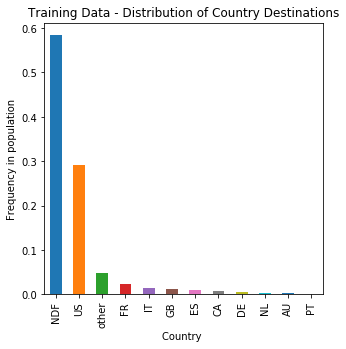

In [18]:
plt.rcParams['figure.figsize'] = [5, 5]
dfs['train_users_2'].country_destination.value_counts(normalize=True).plot.bar()
plt.title("Training Data - Distribution of Country Destinations")
plt.ylabel("Frequency in population")
plt.xlabel("Country ")

Text(0.5, 1.0, 'Training Data - NaN Value Patterns')

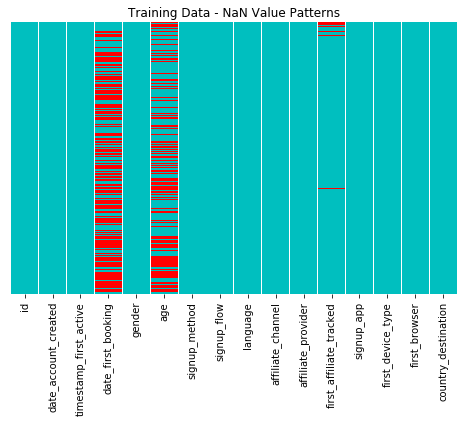

In [57]:
#dfs['train_users_2'].age.describe()
plt.rcParams['figure.figsize'] = [8, 5]
sns.heatmap(dfs['train_users_2'].isnull(), cbar=False, cmap=["c","r"], yticklabels=False)
plt.title("Training Data - NaN Value Patterns")

Text(0.5, 0, 'Country Destination')

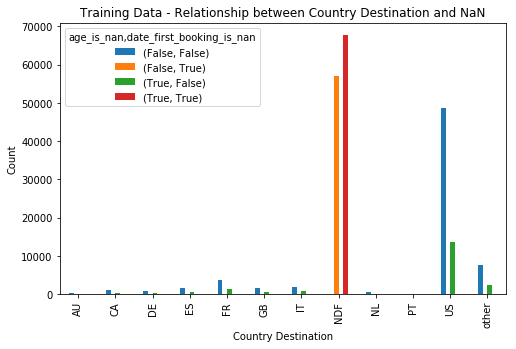

In [56]:
null_viz = dfs['train_users_2'].copy()
null_viz = null_viz.assign(age_is_nan=null_viz['age'].isnull())
null_viz = null_viz.assign(date_first_booking_is_nan=null_viz['date_first_booking'].isnull())
null_viz = null_viz.assign(first_affiliate_tracked_is_null=null_viz['first_affiliate_tracked'].isnull())

#null_viz = null_viz[null_viz['age_is_nan'] | null_viz['date_first_booking_is_nan']]
null_viz = null_viz[['country_destination', 'age_is_nan', 'date_first_booking_is_nan', 'first_affiliate_tracked_is_null']]

plt.rcParams['figure.figsize'] = [8, 5]
pd.crosstab(null_viz['country_destination'], [null_viz['age_is_nan'],null_viz['date_first_booking_is_nan']]).plot.bar()
plt.title("Training Data - Relationship between Country Destination and NaN")
plt.ylabel("Count")
plt.xlabel("Country Destination")

### Multivariate exploration

Observations:
+ unknown gender and NDF are highly correlated
+ When a destination_country speaks the same language as the user, there is an increased probability that the user will go to that country.  However, users overwhelming are going to english speaking destinations, regardless of their chosen language.
+ When a user is young, they are more likely to be female, whereas when they are older, there is equal probability of male or female.

Gender and country destination

gender,-unknown-,FEMALE,MALE,OTHER
country_destination,,,,
AU,143,207,188,1
CA,491,455,477,5
DE,284,358,416,3
ES,715,853,677,4
FR,1713,1962,1335,13
GB,758,881,682,3
IT,1040,1091,699,5
NDF,66670,31048,26719,106
NL,227,254,278,3


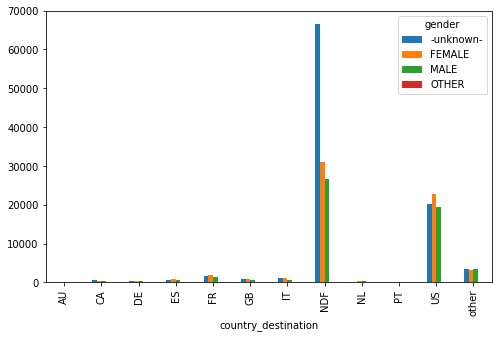

In [41]:
display(pd.crosstab(dfs['train_users_2']['country_destination'],dfs['train_users_2']['gender']))
pd.crosstab(dfs['train_users_2']['country_destination'],dfs['train_users_2']['gender']).plot.bar()

User language and language at destination (excluding language)

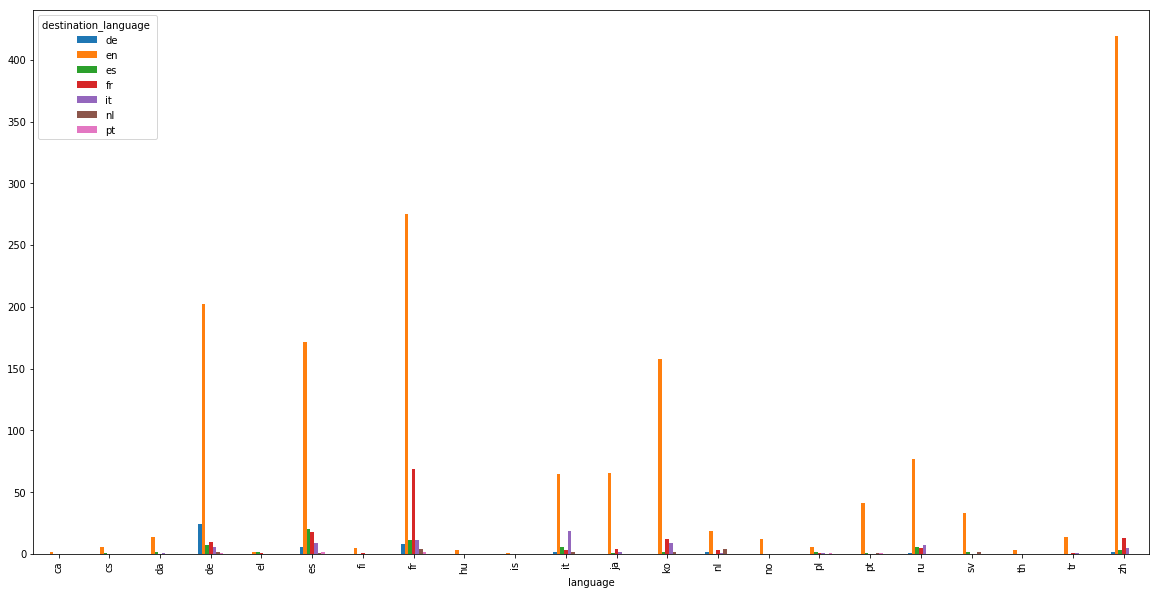

In [42]:
countriesWithLanguage = dfs['countries'].copy()
countriesWithLanguage['destination_language '] = pd.Series(['en', 'en', 'de', 'es', 'fr', 'en', 'it', 'nl', 'pt', 'en'])
joined_country = dfs['train_users_2'].join(countriesWithLanguage.set_index('country_destination'), on='country_destination')
joined_country_no_english = joined_country[joined_country['language'] != 'en']
plt.rcParams['figure.figsize'] = [20, 10]
ct = pd.crosstab(joined_country_no_english['language'],joined_country_no_english['destination_language ']).plot.bar()

,english_speaking,non-english_speaking
0.00,0.846520,0.820473
63.22,0.009679,0.009259
72.61,0.013217,0.023148
89.40,0.035944,0.037037
92.06,0.063510,0.072531
92.25,0.028399,0.033951
95.45,0.002732,0.003601


Text(0.5, 0, 'Language Levenshtein Distance (0 is identical)')

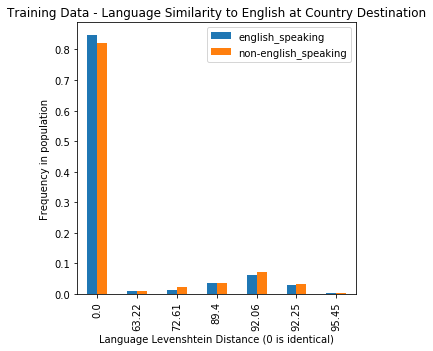

In [54]:
joined_country = dfs['train_users_2'].join(dfs['countries'].set_index('country_destination'), on='country_destination')
jc_other = joined_country[joined_country['language'] != 'en']['language_levenshtein_distance'].value_counts(normalize=True)
jc_english = joined_country[joined_country['language'] == 'en']['language_levenshtein_distance'].value_counts(normalize=True)

languages = pd.DataFrame({"english_speaking": jc_english, "non-english_speaking": jc_other})
#languages['language_levenshtein_distance'] = languages.index
languages.sort_index(inplace=True)
display(languages)

plt.rcParams['figure.figsize'] = [5, 5]
languages.plot.bar()
plt.title("Training Data - Language Similarity to English at Country Destination")
plt.ylabel("Frequency in population")
plt.xlabel("Language Levenshtein Distance (0 is identical)")

Age and gender among users

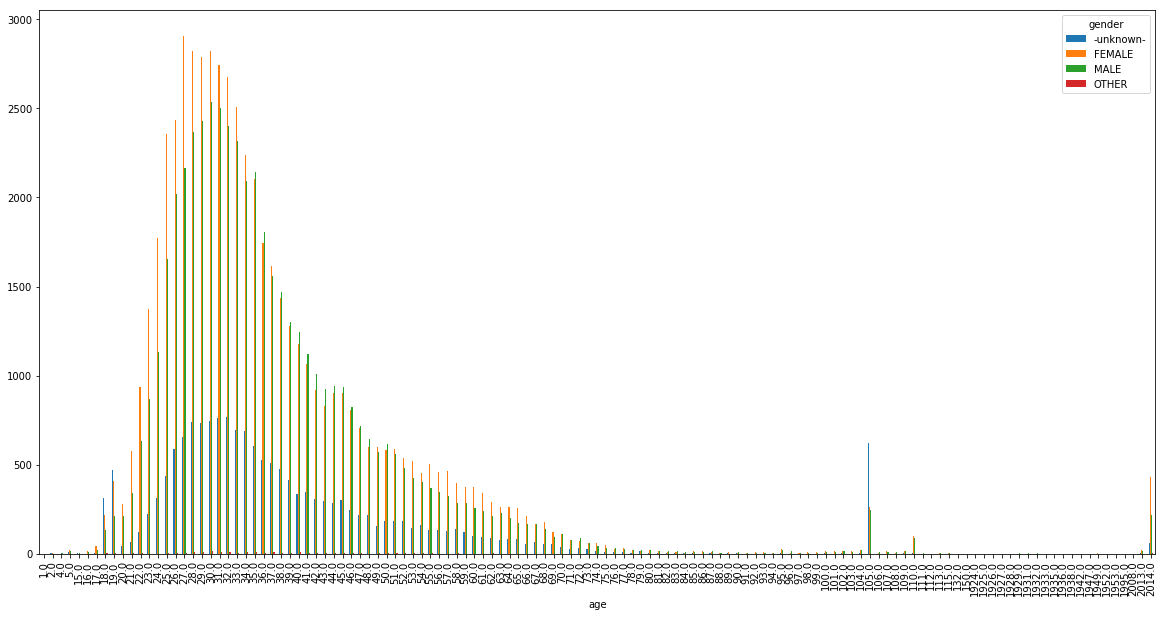

In [44]:
pd.crosstab(dfs['train_users_2']['age'],dfs['train_users_2']['gender']).plot.bar()